In [59]:
import requests
import json
import base64
from matplotlib import pyplot as plt
from matplotlib import patches
import cv2
import sys
import os

In [22]:
sys.path.append(os.path.abspath("../src"))

In [23]:
from utils import align_to_template

In [28]:
image = cv2.imread("/Users/volpea/Documents/projects/document-generator-job/data/test/example_form_real_2.jpg")
template = cv2.imread("/Users/volpea/Documents/projects/document-generator-text-extractor/data/templates/example_form_template.webp")

In [ ]:
registered_image = align_to_template(image, template)

In [34]:
_, buffer = cv2.imencode(".png", registered_image)
encoded_image = base64.b64encode(buffer).decode("utf8")

In [35]:
model_api_url = "http://localhost:5001/predict"

In [36]:
response = requests.post(model_api_url, 
                         headers={"Content-Type": "application/json"}, 
                         data=json.dumps({
                             "image": encoded_image
                             }))

In [37]:
response.status_code

200

In [38]:
predictions = response.json()["predictions"]

In [39]:
predictions

[{'class': 2,
  'original_box': [665, 437, 931, 476],
  'predicted_text': '02/03/2025',
  'score': 0.9925031661987305,
  'text_score': 0.9506086111068726},
 {'class': 9,
  'original_box': [663, 539, 1037, 580],
  'predicted_text': 'ANGOLOVOL PE95QGMA',
  'score': 0.9892728924751282,
  'text_score': 0.7371346950531006},
 {'class': 8,
  'original_box': [698, 696, 776, 734],
  'predicted_text': '100',
  'score': 0.9887166023254395,
  'text_score': 0.9637446403503418},
 {'class': 10,
  'original_box': [211, 543, 443, 580],
  'predicted_text': 'VIA ESEMPIO',
  'score': 0.9871702790260315,
  'text_score': 0.9233644008636475},
 {'class': 1,
  'original_box': [101, 702, 321, 734],
  'predicted_text': 'PRQDUCT 1',
  'score': 0.983035683631897,
  'text_score': 0.7876722812652588},
 {'class': 6,
  'original_box': [234, 487, 407, 522],
  'predicted_text': 'ANGELO',
  'score': 0.9735919833183289,
  'text_score': 0.7737131118774414},
 {'class': 5,
  'original_box': [178, 430, 262, 470],
  'predicted

In [47]:
predictions[0]

{'class': 2,
 'original_box': [665, 437, 931, 476],
 'predicted_text': '02/03/2025',
 'score': 0.9925031661987305,
 'text_score': 0.9506086111068726}

In [ ]:
classes = {'Item 1': 1,
 'Date': 2,
 'Quantity 1': 3,
 'Total 1': 4,
 'Number': 5,
 'Customer': 6,
 'Phone': 7,
 'Price 1': 8,
 'Email': 9,
 'Address': 10}

In [54]:
id_to_class = {v: k for k, v in classes.items()}

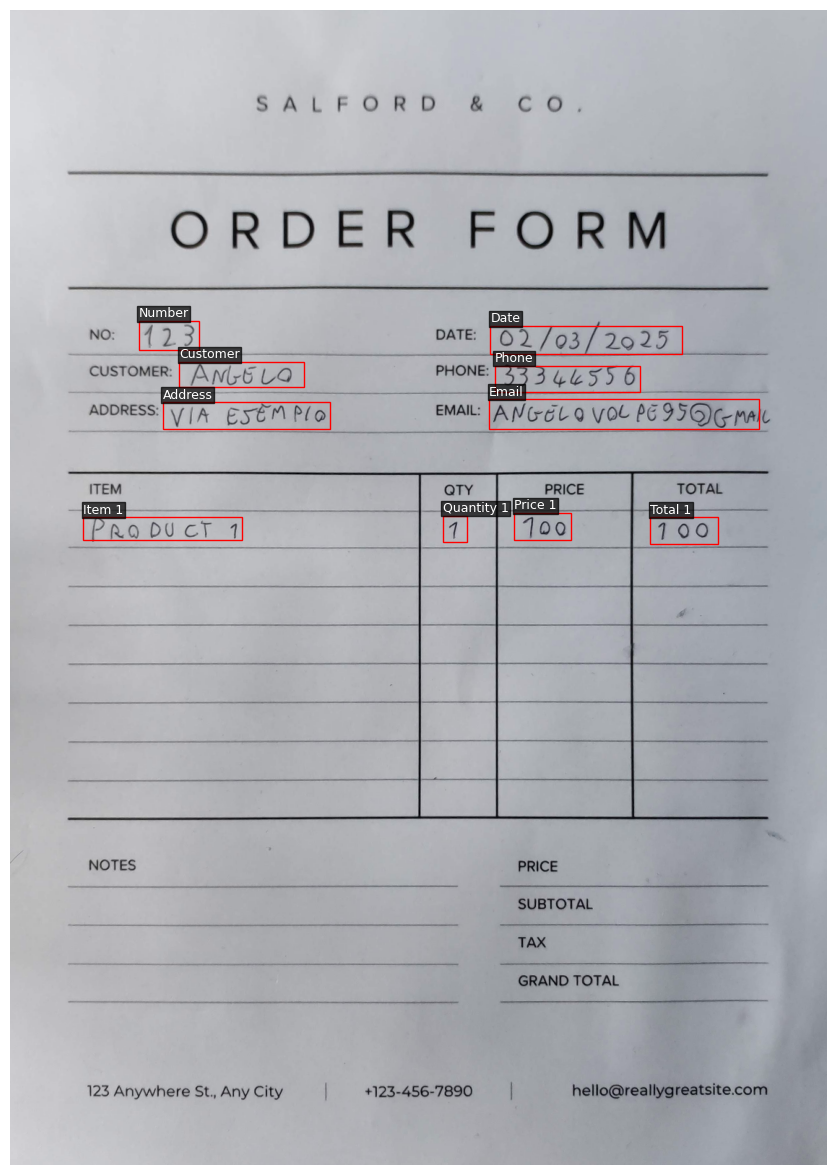

In [95]:
plt.figure(figsize=(15, 15))
plt.imshow(registered_image)
ax = plt.gca()

for pred in predictions:
    x1, y1, x2, y2 = pred["original_box"]
    w, h = x2 - x1, y2 - y1
    predicted_class = pred["class"]
    class_name = id_to_class[predicted_class]
    ax.add_patch(patches.Rectangle((x1, y1), w, h,
                               fill=False, edgecolor="red", linewidth=1))
    
    plt.text(x1, y1-5, class_name, fontsize=9, color='white', 
             bbox={'facecolor': "black", 'alpha': 0.7, 'pad': 1})
    
plt.axis("off")
plt.show()

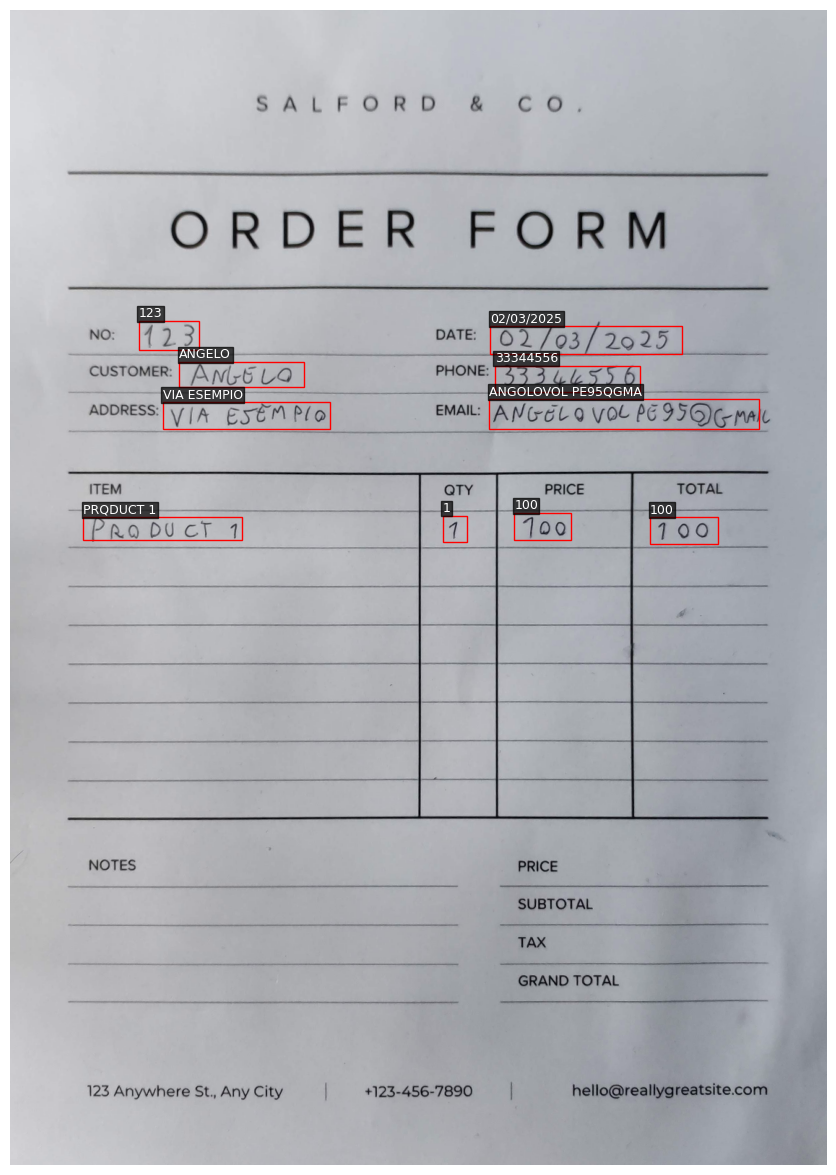

In [96]:
plt.figure(figsize=(15, 15))
plt.imshow(registered_image)
ax = plt.gca()

for pred in predictions:
    x1, y1, x2, y2 = pred["original_box"]
    w, h = x2 - x1, y2 - y1
    predicted_class = pred["class"]
    class_name = id_to_class[predicted_class]
    ax.add_patch(patches.Rectangle((x1, y1), w, h,
                               fill=False, edgecolor="red", linewidth=1))
    
    plt.text(x1, y1-5, pred["predicted_text"], fontsize=9, color='white', 
             bbox={'facecolor': "black", 'alpha': 0.7, 'pad': 1})
    
plt.axis("off")
plt.show()